<h1 align='center' style='color:purple'>Clustering With K Means</h1>

In [47]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("income.csv")

In [3]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [4]:
df.columns=['Name', 'Age', 'Income']

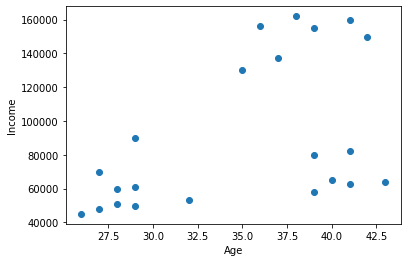

In [5]:
plt.scatter(x=df.Age,y=df.Income)
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

In [6]:
from sklearn.cluster import KMeans

In [7]:
km=KMeans(n_clusters=3) # assigning the number of clusters

In [8]:
X=df[['Age','Income']] # ignoring the name column, since it is a string

In [9]:
km.fit_predict(X)

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [10]:
Y=km.fit_predict(X)

In [11]:
df['Cluster']=Y

In [12]:
df.head()

,Name,Age,Income,Cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [13]:
df0=df[df.Cluster==0]
df1=df[df.Cluster==1]
df2=df[df.Cluster==2]

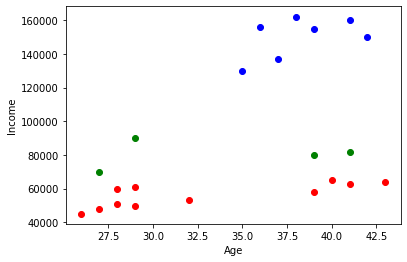

In [14]:
plt.scatter(x=df0.Age,y=df0.Income,color='red')
plt.scatter(x=df1.Age,y=df1.Income,color='blue')
plt.scatter(x=df2.Age,y=df2.Income,color='green')
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

From the above diagram you can see that the clustering is not proper

This is due to the fact that the range of Income and Age are pretty different 

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler=MinMaxScaler()

In [17]:
df['Age']=scaler.fit_transform(df[['Age']])
df['Income']=scaler.fit_transform(df[['Income']])

The values will lie b/w 0 to 1

In [18]:
df.head(10)

,Name,Age,Income,Cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


Again using KMeans

In [19]:
from sklearn.cluster import KMeans

In [20]:
clustering=KMeans(n_clusters=3)

In [21]:
df[['Age','Income']].head()

,Age,Income
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


In [22]:
clusters_007=clustering.fit_predict(df[['Age','Income']])
clusters_007

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [23]:
df.head()

,Name,Age,Income,Cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [24]:
df=df.drop(columns=['Cluster'])

In [25]:
df.head()

,Name,Age,Income
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


In [26]:
df['new_cluster']=clusters_007

In [27]:
df.head()

,Name,Age,Income,new_cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [28]:
df00=df[df.new_cluster==0]
df01=df[df.new_cluster==1]
df02=df[df.new_cluster==2]

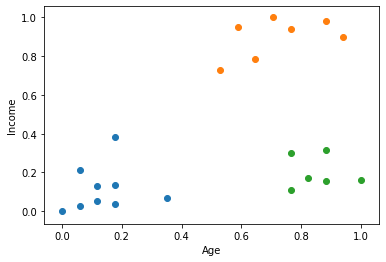

In [29]:
plt.scatter(df00.Age,df00.Income)
plt.scatter(df01.Age,df01.Income)
plt.scatter(df02.Age,df02.Income)
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

Centroids

In [30]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

In [31]:
type(km.cluster_centers_)

numpy.ndarray

In [32]:
kf1=KMeans(n_clusters=3)

In [33]:
from sklearn.preprocessing import MinMaxScaler
df['Age']=scaler.fit_transform(df[['Age']])
df['Income']=scaler.fit_transform(df[['Income']])

In [34]:
y_pred=kf1.fit_predict(df[['Age','Income']])

In [35]:
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [36]:
kf1.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

In [37]:
df.head()

,Name,Age,Income,new_cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [38]:
a=df[df.new_cluster==0]
b=df[df.new_cluster==1]
c=df[df.new_cluster==2]

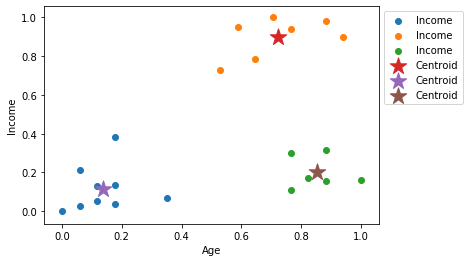

In [39]:
plt.scatter(a.Age,a.Income,label='Income')
plt.scatter(b.Age,b.Income,label='Income')
plt.scatter(c.Age,c.Income,label='Income')
for x,y in kf1.cluster_centers_:
    plt.scatter(x,y,marker='*',s=300,label='Centroid')
plt.xlabel("Age")
plt.ylabel("Income")
plt.legend(loc='upper left',bbox_to_anchor=(1,1))
plt.show()


Elbow Plot

In [40]:
EBP=KMeans()

In [41]:
EBP=KMeans(n_clusters=3)
EBP.fit(df[['Age','Income']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [42]:
EBP.inertia_ ## SSE: sum of square error for k=3

0.47507834985530945

When u fit a data to object of KMeans,
SSE is calculated: sum of squared error is calculated

In [43]:
numofk=[1,2,3,4,5,6,7,8,9,10,11] # number of K
SSE=[]
for each in numofk:
    EBP=KMeans(n_clusters=each)
    EBP.fit(df[['Age','Income']])
    SSE.append(EBP.inertia_)
    
    

In [44]:
SSE

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530945,
 0.3491047094419564,
 0.27558255687229755,
 0.21055478995472487,
 0.16858512236029755,
 0.13706529523670866,
 0.10188787724979424,
 0.08548385105848212,
 0.06153359671422249]

Text(0, 0.5, 'Sum of square error')

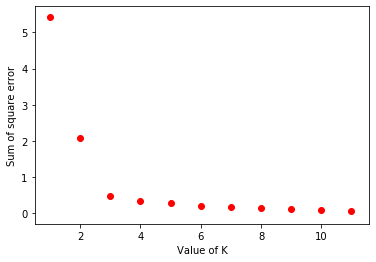

In [45]:
for i in range (len(numofk)):
    plt.scatter(numofk[i],SSE[i],color='red')
plt.xlabel("Value of K")
plt.ylabel("Sum of square error")




Text(0, 0.5, 'Sum of square error')

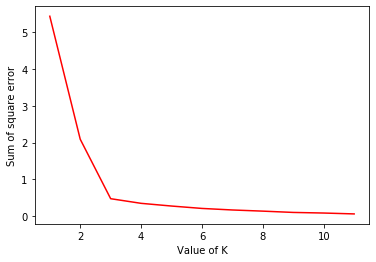

In [46]:
plt.plot(numofk,SSE,color='red')
plt.xlabel("Value of K")
plt.ylabel("Sum of square error")

<h1 align='center' style='color:purple'>Clustering With K Means: Problem 2</h1>

Problem Statement:

1. Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features.
   Drop other two features for simplicity.
   
2. Figure out if any preprocessing such as scaling would help here

3. Draw elbow plot and from that figure out optimal value of k

In [48]:
import pandas as pd
from sklearn.datasets import load_iris
flowers=load_iris()

In [49]:
X=pd.DataFrame(flowers.data,columns=flowers.feature_names)

In [50]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [51]:
X.columns=['sepallength', 'sepalwidth', 'petallength',
       'petalwidth']

In [52]:
X=X.drop(columns=['sepallength', 'sepalwidth'])

In [53]:
X.head()

,petallength,petalwidth
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [54]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
X['petallength']=scale.fit_transform(X[['petallength']])
X['petalwidth']=scale.fit_transform(X[['petalwidth']])

In [55]:
X.head()

,petallength,petalwidth
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


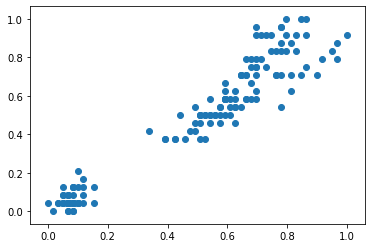

In [56]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(X.petallength,X.petalwidth)

In [57]:
from sklearn.cluster import KMeans

In [58]:
kkm=KMeans(n_clusters=3)
y_pred=kkm.fit_predict(X[['petallength','petalwidth']])


In [59]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [60]:
X['cluster']=y_pred

In [61]:
X.head()

,petallength,petalwidth,cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


In [62]:
X0=X[X.cluster==0]
X1=X[X.cluster==1]
X2=X[X.cluster==2]

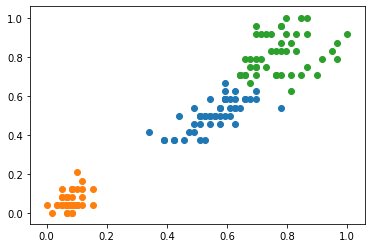

In [63]:
plt.scatter(X0.petallength,X0.petalwidth)
plt.scatter(X1.petallength,X1.petalwidth)
plt.scatter(X2.petallength,X2.petalwidth)
plt.show()

In [64]:
kkm.cluster_centers_

array([[0.55867014, 0.51041667],
       [0.07830508, 0.06083333],
       [0.7740113 , 0.81510417]])

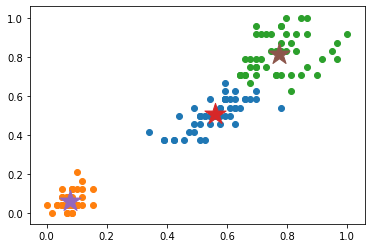

In [67]:
plt.scatter(X0.petallength,X0.petalwidth)
plt.scatter(X1.petallength,X1.petalwidth)
plt.scatter(X2.petallength,X2.petalwidth)
for x,y in kkm.cluster_centers_:
    plt.scatter(x,y,marker='*',s=500)
plt.show()

In [ ]:
numofk=[1,2,3,4,5,6,7,8,9,10,11] # number of K
SSE=[]
for each in numofk:
    EBP=KMeans(n_clusters=each)
    EBP.fit(X[['petallength','petalwidth']])
    SSE.append(EBP.inertia_)

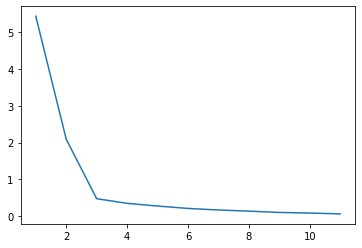

In [66]:
plt.plot(numofk,SSE)